In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


import keras
from keras.models import load_model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools

dir_path= "./tests images"

In [2]:
#confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "red")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
# reconstruct the model from the presaved that has been trained
reconstructed_model = keras.models.load_model("model.hdf5")

In [4]:
# compile the model
adam =  Adam(lr=0.001) 
reconstructed_model.compile(optimizer= adam, loss='categorical_crossentropy', metrics = ['acc'])

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=False,
    vertical_flip=False)                           

In [16]:
test_gen=datagen.flow_from_directory( directory=dir_path,  
                                      batch_size=32,                   
                                      class_mode="categorical",
                                      color_mode="rgb",
                                      shuffle= False,
                                      target_size=(224,224))

Found 51 images belonging to 6 classes.


In [17]:
STEP_SIZE_TEST=test_gen.n//test_gen.batch_size
preds=reconstructed_model.predict_generator(test_gen,STEP_SIZE_TEST+1)

In [18]:
predictions= np.argmax(preds, axis = 1)
accuracy_score(test_gen.classes, predictions)

0.5490196078431373

Confusion matrix, without normalization
[[ 1  0  0  0  0  0]
 [ 0  0  1  8  1  1]
 [ 0  0  0  1  2  0]
 [ 0  0  4 23  0  0]
 [ 0  0  0  5  2  0]
 [ 0  0  0  0  0  2]]


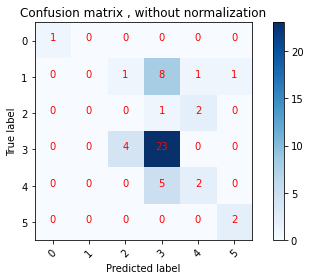

In [19]:
cnf_matrix = confusion_matrix(test_gen.classes, predictions)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4,5],title='Confusion matrix , without normalization')

In [20]:
test_gen.classes

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 5, 5], dtype=int32)

testing trails:
    1/Zugspitze via Höllental (mountains)
    2/Herzogstand and Heimgarten	(mountains, very small lake view)
    3/Wimbachklamm	(cave, forest..)
    4/Rund um den Hintersee
    5/Garmisch Partenkirchen and Gschwandtner Bauer Pfeifferalm Loop

In [21]:
predictions

array([0, 3, 3, 3, 3, 3, 3, 4, 3, 2, 5, 3, 3, 4, 4, 3, 3, 3, 2, 3, 2, 3,
       3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 3, 3, 3, 4, 5, 5])